## Supervised Learning Project : Ashish Agarwal

## Import Libraries

In [152]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

## Read Input data file

In [151]:
# Read the input data file and create a dataframe
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv', header=0)
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Explore input data

In [3]:
data.shape

(5000, 14)

In [4]:
# OBSERVATION  1 : There are 5000 rows and 14 columns in the dataset. 

In [5]:
# OBSERVATION 2 : All columns are numeric columns (integer or float)

# ID : Customer Id
# Age: Customer's Age in completed years
# Experience : Number of years of professional experience
# Income : Annual income of the customer ($000)
# Zip Code : Home address zip code
# Family : Family size of the customer 
# CCAvg : Average spending on the credit card per month ($000)
# Education : Education Level. 1 - Undergrad, 2-Graduate, 3-Advanced/Professional
# Mortgage : Value of House Mortgage (if any) ($000)
# Personal Loan : Did this person accept a personal loan offered in the last campaign
# Securities Account : Does the customer have a securities account with the bank?
# CD Account : Does the customer have a CD account with the bank?
# Online : Does the customer use internet banking facilities?
# Credit Card : Does the customer use a credit card issues by the bank?

In [6]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## Plot Age distribution

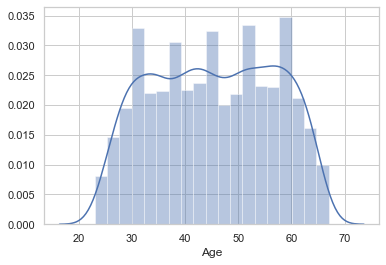

In [188]:
sns.distplot(data['Age'])
plt.show()

In [8]:
# OBSERVATION 3:
# Age ranges between 23 to 67 years with a median age of around 45 years. Different age groups are well represented. 

## Plot Experience and replace negative experience values with zero.

In [189]:
data['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

In [190]:
# OBSERVATION 4:
# Professional experience varies between 0 to 43 years with the median experience around 20 years. 

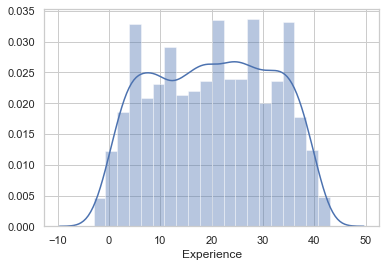

In [191]:
sns.distplot(data['Experience'])
plt.show()

In [192]:
# OBSERVATION 5: Experience has negative values that can be repalced with a zero. 

In [193]:
data[data['Experience']<0].Experience.count()

52

In [194]:
# OBSERVATION 6: 52 rows have negative values of experience
# Replace -ve experience values with a ZERO
# Check if all the negative values have been replaced.

In [17]:
data.loc[data['Experience'] < 0] = 0
data[data['Experience']<0].Experience.count()

0

## Plot Income distribution

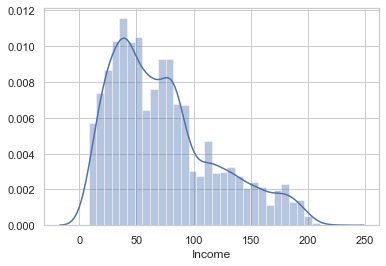

In [195]:
sns.distplot(data['Income'])
plt.show()

In [196]:
# OBSERVATION 7:
# Income varies between 8K to 224K. Median income is 64K. Mean income is 73K. 

## Explore Zip Code data

In [197]:
Unique_Zip_Codes = pd.DataFrame(data['ZIP Code'].unique())

In [198]:
Unique_Zip_Codes.count()

0    467
dtype: int64

In [199]:
# OBSERVATION 8: There are 467 different ZIP Codes that the customers belong to. 

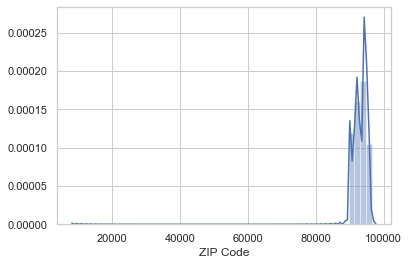

In [200]:
sns.distplot(data['ZIP Code'])
plt.show()

In [201]:
data['ZIP Code'].mode()

0    94720
dtype: int64

In [25]:
# OBSERVATION 9: The most customers are from the ZIP Code 94720

## Plot Family information

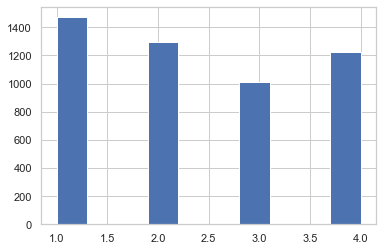

In [202]:
data['Family'].hist()

In [203]:
# OBSERVATION 10
# Family - Family sizes vary between 1 member to 4 members in the family. Median is 2 members per family. 
# Highest family membership is single members.

In [28]:
data['Family'].unique()

array([4, 3, 1, 2, 0], dtype=int64)

## Plot Monthly Credit Card Balance distribution

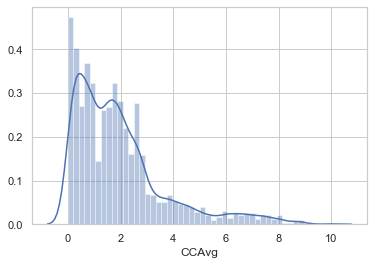

In [204]:
sns.distplot(data['CCAvg'])
plt.show()

In [205]:
# OBSERVATION 11:
# CCAvg - The average spending on the credit card per month is between 0 to 10K. Median spend is 1.5K and avg spend is 1.8K

## Plot Education Levels of the customers

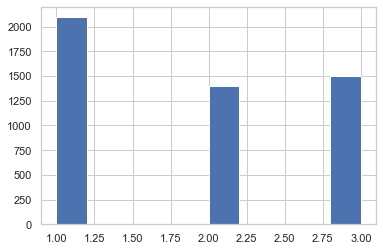

In [206]:
data['Education'].hist()

In [207]:
data['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [33]:
# OBSERVATION 12
# 1.04% of the customers do not have professional education 
# 41.6% has undergraduate education
# 27.74% has master's education
# 29.62% have professional or advanced education

## Plot Mortgage distribution

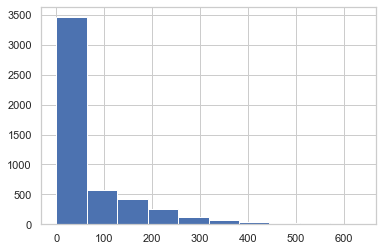

In [208]:
(data['Mortgage']).hist()

In [209]:
# OBSERVATION 13
# Mortgage - varies between 0K to 635K. Median mortgage is 0K. 

In [210]:
data['Mortgage'].mode()

0    0
dtype: int64

In [37]:
# OBSERVATION 14
# Most customers do not have a mortgage with the bank. 

## Plot Personal Loan distribution

In [211]:
data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

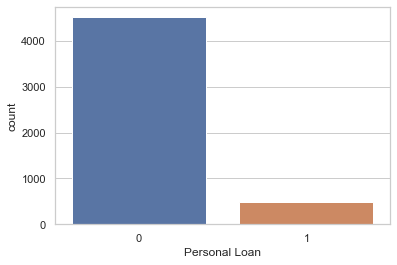

In [212]:
sns.countplot(x="Personal Loan", data=data)

In [40]:
# OBSERVATION 15: 9.6% of the total customers had accepted the loan last time while 90.4% had declined the loan
# Given that only about 9% of the customers accepted the loan, the ratio of personal loans to no personal 
# loan is not balanced. 

## Plot Securities Account distribution

In [213]:
data['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

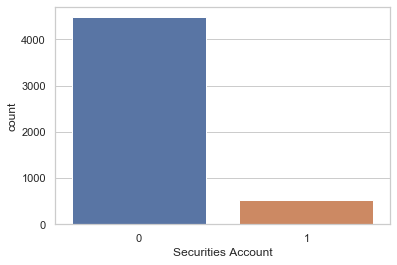

In [214]:
sns.countplot(x="Securities Account", data=data)

In [215]:
# OBSERVATION 16: 10.44% of the total customers have a Securities Account while 89.56% of customers do not have a Sec A/c

## Plot CD Account distribution

In [216]:
data['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

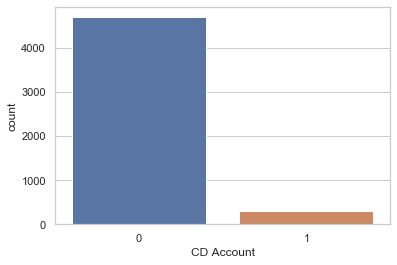

In [217]:
sns.countplot(x="CD Account", data=data)

In [46]:
# OBSERVATION 17: 6.04% of customers have a CD account while 93.96% do not have a CD Account

## Plot Online distribution

In [218]:
data['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

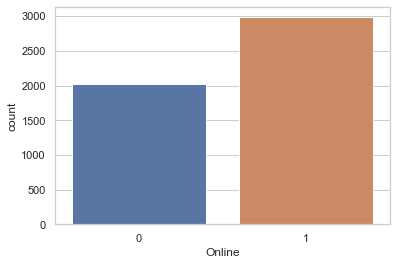

In [219]:
sns.countplot(x="Online", data=data)

In [49]:
# OBSERVATION 18: 59.68% of customers transact online while 40.32% of trhe customers do not transact online

## Plot Credit Card distribution

In [220]:
data['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

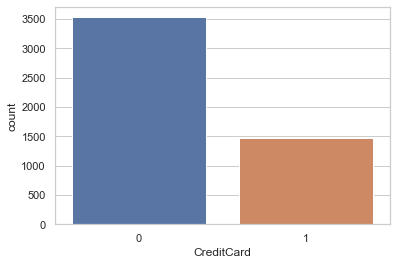

In [221]:
sns.countplot(x="CreditCard", data=data)

In [222]:
# OBSERVATION 19: 29.4% of the customers have a credit card while 70.6% of the customers do not have a credit card

## Create a dataframe of customers that accepted personal loan during last campaign and explore this data.

In [228]:
# Get data for customers that accepted the personal loan during last campaign

In [229]:
Personal_Loan_Filter = data['Personal Loan'] == 1

In [230]:
Personal_Loan_Customers = pd.DataFrame()

In [231]:
Personal_Loan_Customers = data[Personal_Loan_Filter]

In [232]:
Personal_Loan_Customers.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
16,17,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
18,19,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
29,30,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
38,39,42,18,141,94114,3,5.0,3,0,1,1,1,1,0


In [233]:
Personal_Loan_Customers['Personal Loan'].count()

480

In [234]:
Personal_Loan_Customers.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.0,480.000000,480.000000,480.00000,480.000000
mean,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,1.0,0.125000,0.291667,0.60625,0.297917
std,1394.393674,11.590964,11.582443,31.584429,1759.223753,1.115393,2.097681,0.753373,160.847862,0.0,0.331064,0.455004,0.48909,0.457820
min,10.000000,26.000000,0.000000,60.000000,90016.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
25%,1166.500000,35.000000,9.000000,122.000000,91908.750000,2.000000,2.600000,2.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
50%,2342.000000,45.000000,20.000000,142.500000,93407.000000,3.000000,3.800000,2.000000,0.000000,1.0,0.000000,0.000000,1.00000,0.000000
75%,3566.000000,55.000000,30.000000,172.000000,94705.500000,4.000000,5.347500,3.000000,192.500000,1.0,0.000000,1.000000,1.00000,1.000000
max,4981.000000,65.000000,41.000000,203.000000,96008.000000,4.000000,10.000000,3.000000,617.000000,1.0,1.000000,1.000000,1.00000,1.000000


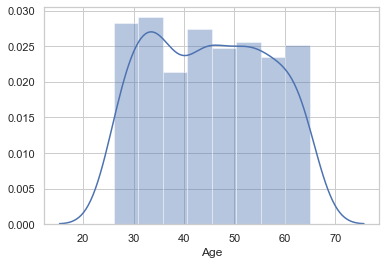

In [235]:
sns.distplot(Personal_Loan_Customers['Age'])
plt.show()

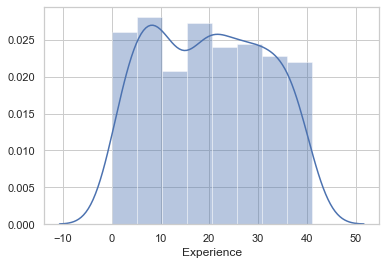

In [236]:
sns.distplot(Personal_Loan_Customers['Experience'])
plt.show()

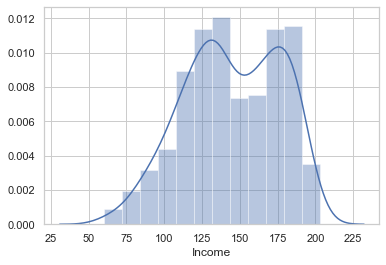

In [237]:
sns.distplot(Personal_Loan_Customers['Income'])
plt.show()

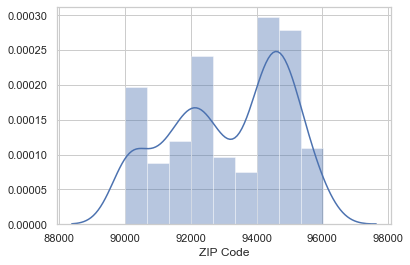

In [238]:
sns.distplot(Personal_Loan_Customers['ZIP Code'])
plt.show()

In [239]:
Loan_ZIP = pd.DataFrame(Personal_Loan_Customers['ZIP Code'].value_counts())

In [65]:
Loan_ZIP.reset_index(inplace=True)
Loan_ZIP.columns = ['ZIP Code','Count']

In [66]:
Loan_ZIP

,ZIP Code,Count
0,94720,19
1,94305,13
2,92093,9
3,90095,8
4,90089,8
...,...,...
233,91942,1
234,90404,1
235,95010,1
236,95521,1


In [67]:
Loan_ZIP.sort_values(by=['Count'], inplace=True, ascending=False)

In [68]:
Loan_ZIP.head(10)

,ZIP Code,Count
0,94720,19
1,94305,13
2,92093,9
3,90095,8
4,90089,8
5,94304,8
6,92182,7
7,94022,6
8,95051,6
9,95616,6


In [69]:
# OBSERVATION 20:
# TOP 10 ZIP Codes where there are personal loan customers are noted above. 

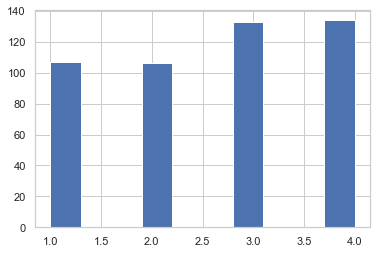

In [70]:
Personal_Loan_Customers['Family'].hist()

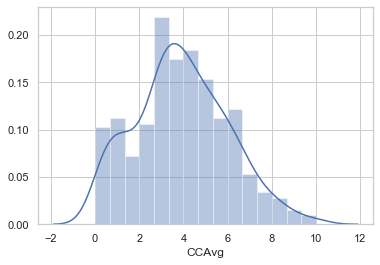

In [71]:
sns.distplot(Personal_Loan_Customers['CCAvg'])
plt.show()

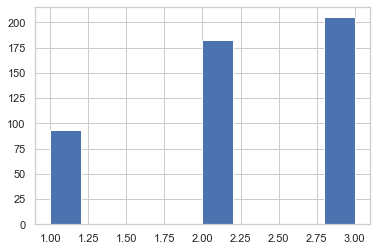

In [72]:
Personal_Loan_Customers['Education'].hist()

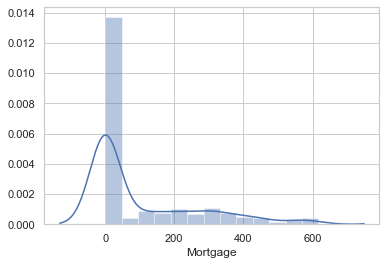

In [73]:
sns.distplot(Personal_Loan_Customers['Mortgage'])
plt.show()

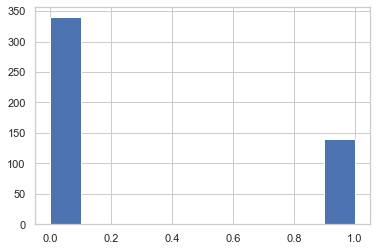

In [74]:
Personal_Loan_Customers['CD Account'].hist()

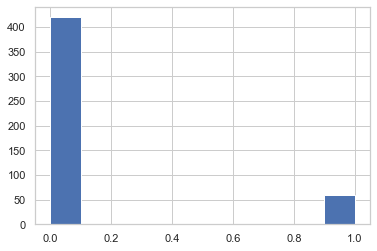

In [75]:
Personal_Loan_Customers['Securities Account'].hist()

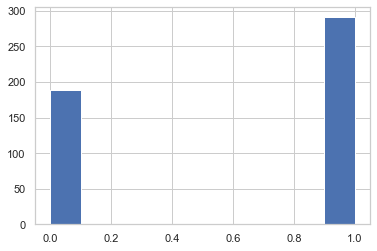

In [76]:
Personal_Loan_Customers['Online'].hist()

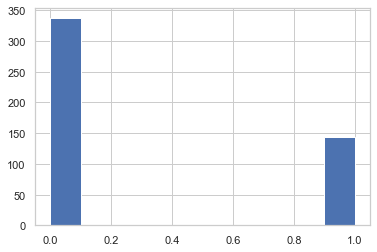

In [77]:
Personal_Loan_Customers['CreditCard'].hist()

In [78]:
# OBSERVATIONS 21:
# TARGET PROFILE OF CUSTOMERS WHO TOOK A PERSONAL LOAN 
# ----------------------------------------------------
# Target profile of customers who accepted Personal Loan is as below (based on last year campaign)
# Age between 25 and 65. Equally likely age groups. No particular age group was more likely to take a personal loan.
# Professional experience varies between 0 to 40 years. No particular experience group was more likely to take a 
# personal loan.
# Income levels around 125K or 175L are likely to apply for a personal loan
# Top 10 ZIP codes where the customers who signed up for a personal loan are identified
# The higher the number of members in the family, the more likely the propensity to take a personal loan
# Families with 3 to 4 members are more likely to take a personal loan than families with 1 or 2 members
# Customers with average monthly Credit Card balance of 3K to 6K are more likely to get a personal loan
# Customers who do not have any education do not generally apply for a personal loan
# Professionals are more likely to take a personal loan than graduates. Graduates are more likely to take a loan than under
# graduates. Higher education appears to have an increased impact on the likelihood of a personal load
# Customers who did not have a mortgage, CD account, Securities Account or credit card are more likely to take a loan
# Most customers who accepted a personal loan appear technology savvy and transact online with the Bank.

In [79]:
data.groupby('Personal Loan').mean()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,2484.240265,45.085177,20.148894,65.432743,92079.745133,2.340487,1.704511,1.819690,51.287832,0.100885,0.035841,0.589159,0.290265
1,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


In [80]:
# OBSERVATIONS 22:
# TARGET PROFILE OF CUSTOMERS WHO TOOK A PERSONAL LOAN 
# ----------------------------------------------------
# Average age of customers who took a personal loan is similar to the ones that did not take a personal loan
# Professional Experience of customers who took a personal loan is similar to the ones that did not take a personal loan
# The Average income of customers who took a loan is much higher than those that did not take a loan
# Average family size of customers who took a loan is similiar to the ones that did not take a personal loan
# Average monthly credit card balance for customers who took a loan is 2 times the ones that did not take a loan
# education levels of customers who took the loan is highre than the customers who did not take the loan
# Mortgage is higher with customers who took the loan than the ones that did not take the loan

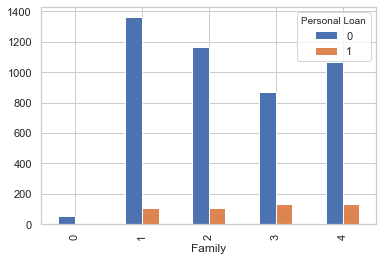

In [81]:
%matplotlib inline
pd.crosstab(data['Family'],data['Personal Loan']).plot(kind='bar')

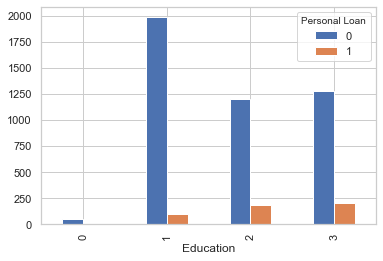

In [82]:
%matplotlib inline
pd.crosstab(data['Education'],data['Personal Loan']).plot(kind='bar')

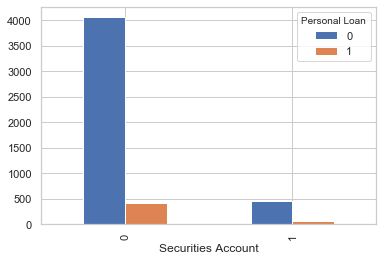

In [83]:
%matplotlib inline
pd.crosstab(data['Securities Account'],data['Personal Loan']).plot(kind='bar')

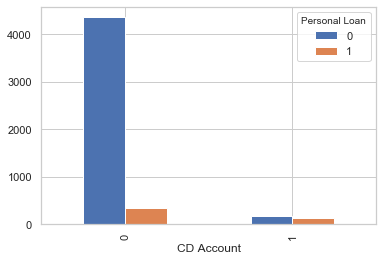

In [84]:
%matplotlib inline
pd.crosstab(data['CD Account'],data['Personal Loan']).plot(kind='bar')

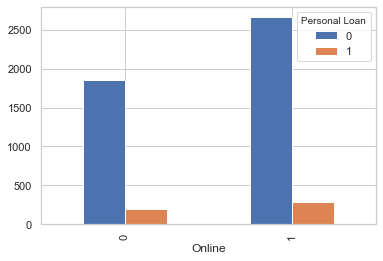

In [85]:
%matplotlib inline
pd.crosstab(data['Online'],data['Personal Loan']).plot(kind='bar')

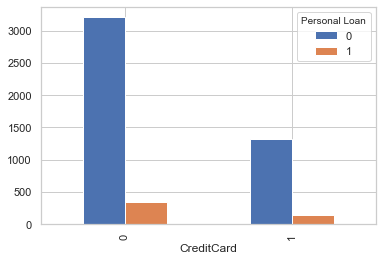

In [86]:
%matplotlib inline
pd.crosstab(data['CreditCard'],data['Personal Loan']).plot(kind='bar')

## Prepare training and test data (unbalanced categories)

In [87]:
# Let's start preparing the training and testing datasets now. 
# The Education Column will need to be converted into dummy variables for No_Education, Under Grad, Grad and Professional
# Dropped ZIP Code and replaced it with a binary variable to identify if the ZIP code had a personal loan or not. Some ZIP
# Codes will have customers more likely to take a personal loan. The ZIP code could be a proxy for economic affluence. 

In [88]:
final_data = pd.DataFrame()
final_data = data.copy()

In [89]:
final_data = pd.get_dummies(data,columns=['Education'])
final_data = pd.merge(final_data,Loan_ZIP,how='left',on=['ZIP Code','ZIP Code'])
final_data['Count'] = final_data['Count'].fillna(0)
final_data['ZIP Code'] = np.where(final_data['Count']>0, '1', '0')
final_data.drop('ID',axis=1,inplace=True)
final_data.drop('Count',axis=1,inplace=True)

In [90]:
final_data

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_0,Education_1,Education_2,Education_3
0,25,1,49,1,4,1.6,0,0,1,0,0,0,0,1,0,0
1,45,19,34,1,3,1.5,0,0,1,0,0,0,0,1,0,0
2,39,15,11,1,1,1.0,0,0,0,0,0,0,0,1,0,0
3,35,9,100,0,1,2.7,0,0,0,0,0,0,0,0,1,0
4,35,8,45,1,4,1.0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1,1.9,0,0,0,0,1,0,0,0,0,1
4996,30,4,15,1,4,0.4,85,0,0,0,1,0,0,1,0,0
4997,63,39,24,1,2,0.3,0,0,0,0,0,0,0,0,0,1
4998,65,40,49,1,3,0.5,0,0,0,0,1,0,0,0,1,0


In [91]:
final_data.shape

(5000, 16)

In [92]:
final_data.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard', 'Education_0', 'Education_1', 'Education_2',
       'Education_3'],
      dtype='object')

In [93]:
# Our data has 480 customers who took a personal loan while 4520 customers who did not take a personal loan
# Our data is UNBALANCED with a 1:9.4 ratio. 
# We will attempt to develop the model with UNBALANCED data and then BALANCE it using SMOTE algorithm to rebuild the model

In [94]:
X_unb = final_data.loc[:, final_data.columns != 'Personal Loan']
y_unb = final_data.loc[:, final_data.columns == 'Personal Loan']

In [95]:
X_train_unb, X_test, y_train_unb, y_test = train_test_split(X_unb, y_unb, test_size=0.3, random_state=0)
columns = X_train_unb.columns

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 

In [97]:
logreg_unb = LogisticRegression(solver='liblinear')

In [98]:
logreg_unb.fit(X_train_unb, y_train_unb.values.ravel()) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
y_pred_unb = logreg_unb.predict(X_test)

## Calculate Accuracy and confusion matrix with unbalanced categories

In [100]:
print('Accuracy of logistic regression classifier on UNBALANCED test set: {:.2f}'.format(logreg_unb.score(X_test, y_test)))

Accuracy of logistic regression classifier on UNBALANCED test set: 0.96


In [101]:
from sklearn.metrics import confusion_matrix

In [102]:
confusion_matrix_unb = confusion_matrix(y_test, y_pred_unb)
print(confusion_matrix_unb)

[[1357   15]
 [  42   86]]


Text(0.5, 1, 'Confusion Matrix - Unbalanced Data')

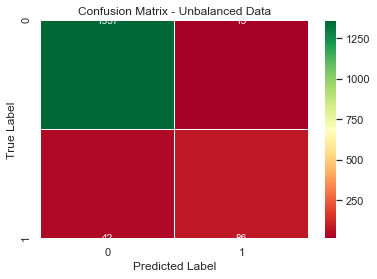

In [103]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#%matplotlib inline
#from sklearn.metrics import confusion_matrix
#matrix = confusion_matrix(y_test, pred)
sns.heatmap(confusion_matrix_unb,annot=True,fmt="",cmap='RdYlGn',linewidths=0.4,cbar=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix - Unbalanced Data')

## Prepare classification report and ROC curve

In [240]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_unb))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1372
           1       0.85      0.67      0.75       128

    accuracy                           0.96      1500
   macro avg       0.91      0.83      0.87      1500
weighted avg       0.96      0.96      0.96      1500



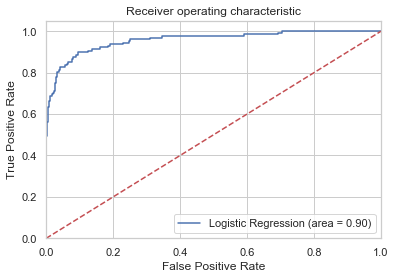

In [241]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc_unb = roc_auc_score(y_test, logreg_unb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg_unb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Prepare Training and Test data - Balanced using SMOTE technique

In [242]:
# Since our data for customers who took a personal loan is unblanced from the customers who did not take a personal loan
# We will use SMOTE (Synthetic Minority Oversampling Technique) to create synthetic samples and balance categories
# Only the training data will be subjected to SMOTE to generate synthetic training data
# The accuracy with unbalanced data is 0.96. However, due to unbalanced data, there is likelihood of bias towards 
# predicting that a customer may not take a personal loan. 

In [243]:
X_b = final_data.loc[:, final_data.columns != 'Personal Loan']
y_b = final_data.loc[:, final_data.columns == 'Personal Loan']

In [244]:
from imblearn.over_sampling import SMOTE

In [245]:
os = SMOTE(random_state=0)

In [246]:
X_train_b, X_test, y_train_b, y_test = train_test_split(X_b, y_b, test_size=0.3, random_state=0)
columns = X_train_b.columns

In [247]:
X_train_b.shape

(3500, 15)

In [248]:
y_train_b.shape

(3500, 1)

In [249]:
X_test.shape

(1500, 15)

In [250]:
y_test.shape

(1500, 1)

In [251]:
os_data_X,os_data_y=os.fit_sample(X_train_b, y_train_b)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

C:\Users\Aagarwal2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [252]:
os_data_X.shape

(6296, 15)

In [253]:
os_data_X.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_0,Education_1,Education_2,Education_3
0,36.0,11.0,158.0,1.0,2.0,7.8,114.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,59.0,35.0,102.0,1.0,4.0,3.0,115.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,58.0,33.0,43.0,1.0,2.0,1.6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,49.0,23.0,68.0,1.0,1.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,29.0,3.0,80.0,1.0,4.0,1.8,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [254]:
os_data_y.shape

(6296, 1)

In [255]:
os_data_y.head()

,y
0,0
1,1
2,0
3,0
4,0


In [256]:
print("length of oversampled data is ",len(os_data_X))
print("Number of no Personal Loans in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of Personal Loans",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no Personal Loans data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of Personal Loans data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  6296
Number of no Personal Loans in oversampled data 3148
Number of Personal Loans 3148
Proportion of no Personal Loans data in oversampled data is  0.5
Proportion of Personal Loans data in oversampled data is  0.5


## Using recursive feature elimination, test relevant features for the model

In [258]:
# Now we have a balanced data. We will now perform Recursive Feature elimination. This is to repeatedly construct a 
# model and choose the best or worst performing feature, setting the feature aside and then repeating the process with 
# the remaining features. This is done until all features are tested. 

In [259]:
data_final_vars=final_data.columns.values.tolist()
y=['Personal Loan']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [260]:
# The RFE has selected all the features. 

In [261]:
# Implement the model

In [262]:
from sklearn.linear_model import LogisticRegression

In [263]:
from sklearn import metrics

In [264]:
logreg = LogisticRegression(solver='liblinear')

In [265]:
logreg.fit(os_data_X, os_data_y.values.ravel()) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [266]:
y_pred = logreg.predict(X_test)

In [267]:
y_pred_df = pd.DataFrame(y_pred)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CF8D6BAE08>]],
      dtype=object)

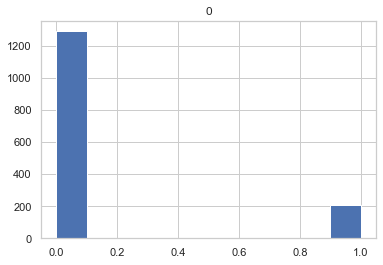

In [268]:
y_pred_df.hist()

## Calculate accuracy and confusion matrix for balanced categories

In [269]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


In [270]:
from sklearn.metrics import confusion_matrix

In [271]:
confusion_matrix = confusion_matrix(y_test, y_pred)

In [272]:
print(confusion_matrix)

[[1275   97]
 [  16  112]]


Text(0.5, 1, 'Confusion Matrix')

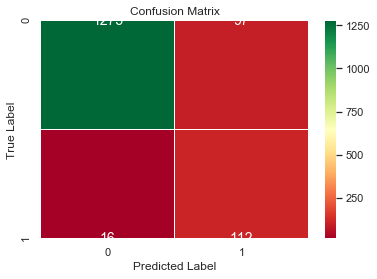

In [273]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#%matplotlib inline
#from sklearn.metrics import confusion_matrix
#matrix = confusion_matrix(y_test, pred)
sns.heatmap(confusion_matrix,annot=True,fmt="",cmap='RdYlGn',linewidths=0.4,cbar=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

## Prepare classification report and ROC curve for balanced categories

In [275]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1372
           1       0.54      0.88      0.66       128

    accuracy                           0.92      1500
   macro avg       0.76      0.90      0.81      1500
weighted avg       0.95      0.92      0.93      1500



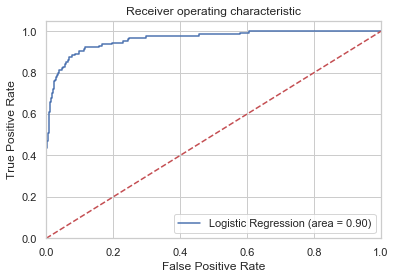

In [276]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [277]:
# To improve the accuracy of the model further, following things can be done.
# 1. Collect more data with more balanced categories.
# 2. Feature scaling or normalization for columns Age, CCAvg, Mortgage, Income and Experience
# 3. Fixing the class imbalance using synthetic sample 
# 4. Attempt different models (other than the Logit regression)